# MNSIT Digit recognition

In [1]:
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
from matplotlib import pyplot as plt

2024-01-09 16:59:43.494485: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 16:59:43.525430: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 16:59:43.526022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 16:59:44.145074: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
print(tf.__version__)

2.13.1


In [4]:
# Load the dataset

cwd = os.getcwd()
mnist_path = os.path.join(cwd, 'data/mnist.npz')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path=mnist_path
)

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

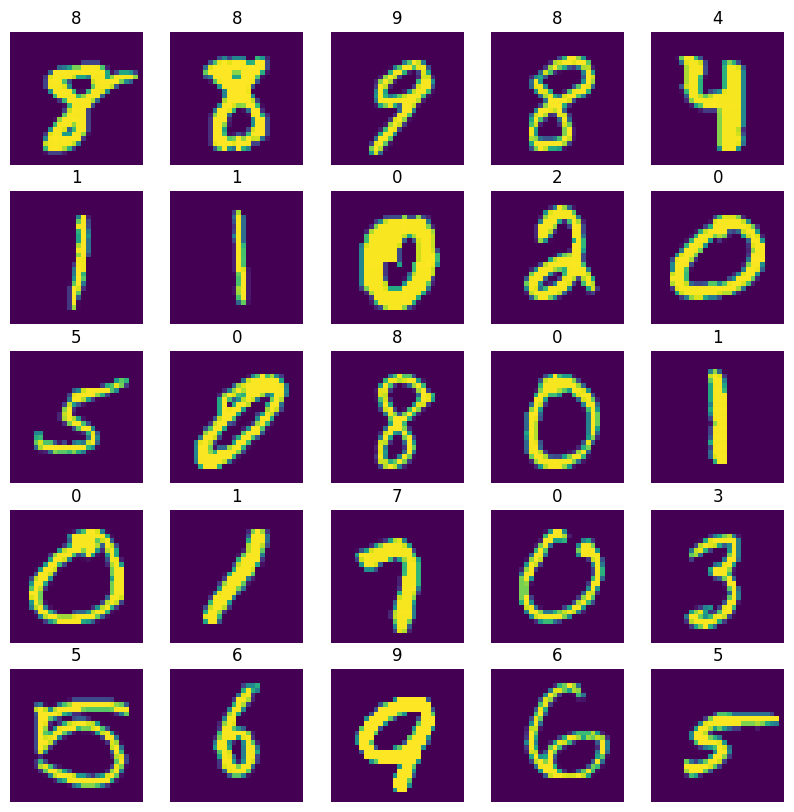

In [7]:
# Display an image that is 28 x 28 from the dataset
num_subplots = 5
fig, axes = plt.subplots(nrows=num_subplots, ncols=num_subplots, figsize=(10, 10))
for idx,ax in enumerate(axes.ravel()): 
    n = np.random.randint(0, x_train.shape[0])
    imgl = x_train[n,:]
    ax.axis('off')
    ax.set_title(f"{y_train[n]}")
    ax.imshow(imgl)
plt.show()


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=14, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 14)        3542      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 14)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 686)               0         
                                                                 
 dense (Dense)               (None, 64)                4

2024-01-09 16:59:46.547643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-09 16:59:46.547948: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
1680/1688 [============================>.] - ETA: 0s - loss: 0.1988 - accuracy: 0.9390
Epoch 1: saving model to training/cnn_mnist.ckpt
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1985 - accuracy: 0.9390 - val_loss: 0.0710 - val_accuracy: 0.9802
Epoch 2/10
1686/1688 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9808
Epoch 2: saving model to training/cnn_mnist.ckpt
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0524 - val_accuracy: 0.9863
Epoch 3/10
1688/1688 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9860
Epoch 3: saving model to training/cnn_mnist.ckpt
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0485 - val_accuracy: 0.9860
Epoch 4/10
1686/1688 [============================>.] - ETA: 0s - loss: 0.0354 - accuracy: 0.9885
Epoch 4: saving model to training/cnn_mnist.ckpt
1688/1688 

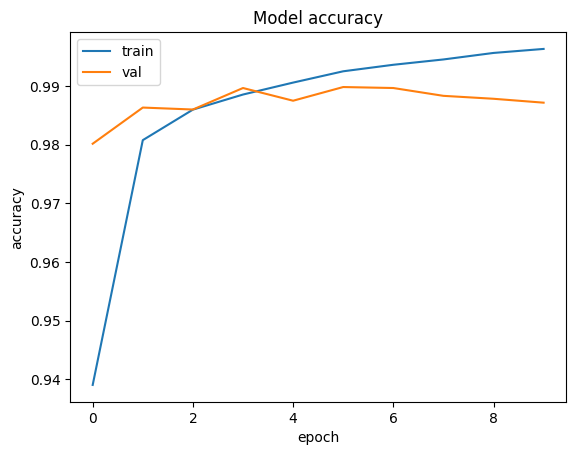

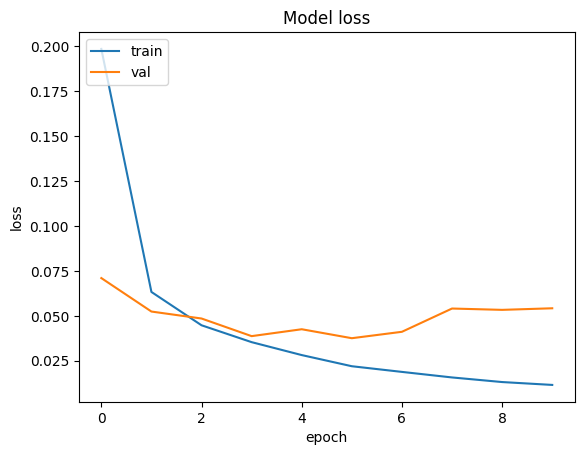

In [9]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

checkpoint_path = "training/cnn_mnist.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

if not os.path.isdir(checkpoint_dir):
    # Create a callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)

    history = model.fit(x_train, y_train,
                        epochs=10, 
                        validation_split= 0.1,
                        callbacks=[cp_callback])
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


else:
    model.load_weights(checkpoint_path)

In [10]:
y_pred = model.predict(x_test)
y_pred_classification = tf.argmax(input=y_pred, axis=1).numpy()

313/313 [==============================] - 1s 2ms/step


In [11]:
incorrect_preds = np.where(y_pred_classification != y_test)[0]

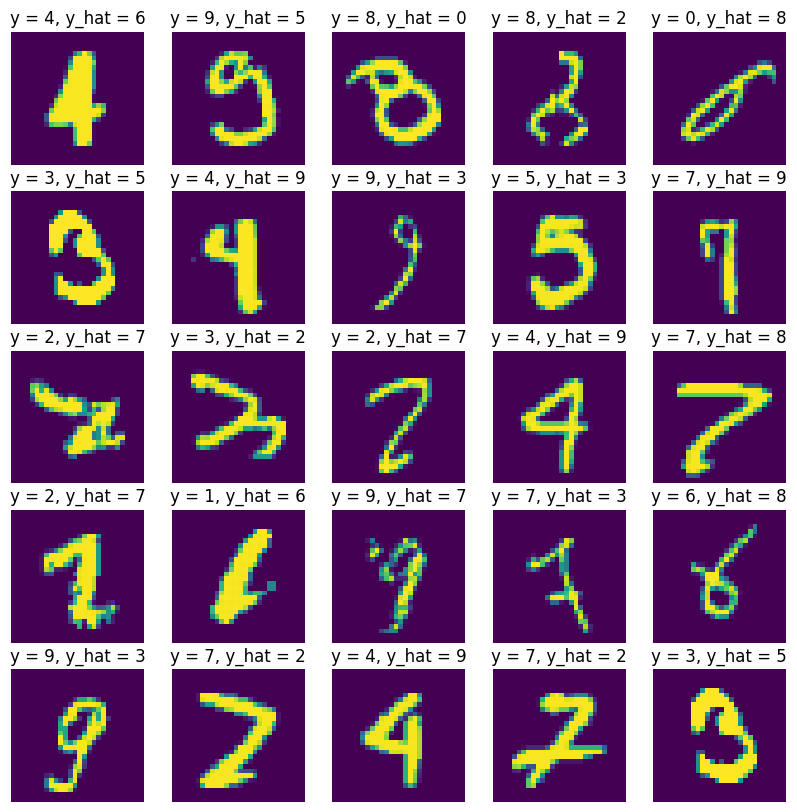

In [12]:
# Display some of the incorrectly classified images
num_subplots = 5
fig, axes = plt.subplots(nrows=num_subplots, ncols=num_subplots, figsize=(10, 10))
for idx,ax in enumerate(axes.ravel()): 
    n = np.random.choice(incorrect_preds)
    imgl = x_test[n,:]
    ax.axis('off')
    ax.set_title(f"y = {y_test[n]}, y_hat = {y_pred_classification[n]}")
    ax.imshow(imgl)
plt.show()